In [181]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import scipy.stats

file_dir = './drive/My Drive/Stock - Triple C/learning/'

# 1.Loading data

In [113]:
predictor_data = pd.read_csv(file_dir + 'data/PredictorData.csv')
predictor_data.head()

,yyyyq,Index,D3,D12,E3,E12,b/m,tbl,AAA,BAA,lty,cay,ntis,Rfree,infl,ltr,corpr,svar,csp,ik,CRSP_SPvw,CRSP_SPvwx
0,18711.0,4.61,NaN,0.26,NaN,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18712.0,4.82,NaN,0.26,NaN,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18713.0,4.84,NaN,0.26,NaN,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18714.0,4.74,NaN,0.26,NaN,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18721.0,5.04,NaN,0.27,NaN,0.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
predictor_data.shape

(542, 22)

In [115]:
predictor_data.iloc[500:]

,yyyyq,Index,D3,D12,E3,E12,b/m,tbl,AAA,BAA,lty,cay,ntis,Rfree,infl,ltr,corpr,svar,csp,ik,CRSP_SPvw,CRSP_SPvwx
500,19961.0,645.50,3.450,14.100,8.96,34.04,0.239300,0.0496,0.0735,0.0803,0.0684,0.011151,0.017020,0.012300,0.014296,-0.069311,-0.048485,0.004393,0.000031,0.037532,0.055388,0.049584
501,19962.0,670.63,3.770,14.270,10.13,34.91,0.236444,0.0509,0.0771,0.0840,0.0703,0.008693,0.027401,0.012524,0.006413,-0.001954,0.001425,0.002502,-0.000848,0.038134,0.045049,0.039408
502,19963.0,687.31,3.890,14.660,9.78,36.00,0.227297,0.0509,0.0766,0.0835,0.0704,0.008740,0.028905,0.012715,0.007011,0.016523,0.019737,0.004163,-0.000539,0.038890,0.031213,0.025321
503,19964.0,740.74,3.790,14.900,9.86,38.73,0.207343,0.0491,0.0720,0.0789,0.0673,0.008285,0.023373,0.012416,0.005063,0.049349,0.043571,0.003019,-0.000397,0.039388,0.083464,0.077698
504,19971.0,757.12,3.610,15.060,10.47,40.24,0.214780,0.0514,0.0755,0.0818,0.0723,0.009648,0.020448,0.012623,0.008814,-0.032417,-0.022108,0.004836,-0.001308,0.039817,0.026425,0.021620
505,19972.0,885.14,3.870,15.160,10.44,40.55,0.184288,0.0493,0.0741,0.0802,0.0688,-0.000244,0.010318,0.012590,0.001873,0.055639,0.050723,0.006987,-0.000662,0.040209,0.175033,0.169812
506,19973.0,947.28,4.060,15.330,9.87,40.64,0.177968,0.0495,0.0715,0.0770,0.0649,-0.003437,0.014817,0.012590,0.005609,0.061429,0.050755,0.007101,-0.000743,0.041632,0.076009,0.071382
507,19974.0,970.43,3.950,15.490,8.94,39.72,0.178801,0.0516,0.0676,0.0732,0.0602,-0.007096,0.015723,0.012698,0.000616,0.068714,0.046172,0.014275,-0.000889,0.041289,0.029499,0.025245
508,19981.0,1101.75,3.760,15.640,10.29,39.54,0.181140,0.0503,0.0672,0.0732,0.0602,-0.018573,0.016629,0.012607,0.005574,0.015188,0.016840,0.004659,-0.000740,0.041994,0.140518,0.136398
509,19982.0,1133.84,4.180,15.950,9.87,38.97,0.178061,0.0498,0.0653,0.0713,0.0576,-0.018654,0.024024,0.012416,0.004928,0.044123,0.033843,0.004671,-0.001169,0.042567,0.034129,0.030238


In [116]:
predictor_data.isna().sum()

yyyyq           2
Index           2
D3            470
D12             2
E3            258
E12             2
b/m           202
tbl           198
AAA           194
BAA           194
lty           194
cay           325
ntis          225
Rfree           2
infl          171
ltr           222
corpr         222
svar           58
csp           279
ik            306
CRSP_SPvw     222
CRSP_SPvwx    222
dtype: int64

In [117]:
data = predictor_data[['yyyyq', 'Index']].copy()
data['dpr'] = -predictor_data.apply(lambda s: math.log(s.D12) - math.log(s.Index), axis = 1)
data['earning_price_ratio'] = -predictor_data.apply(lambda s: math.log(s.E12) - math.log(s.Index), axis = 1)
data['devident_payout_ratio'] = -predictor_data.apply(lambda s: math.log(s.E12) - math.log(s.Index), axis = 1)

data['svar'] = predictor_data.svar
data['b2m'] = predictor_data['b/m']
data['ntis'] = predictor_data.ntis
data['tbl'] = predictor_data.tbl
data['lty'] = predictor_data.lty
data['ltr'] = predictor_data.ltr
data['tms'] = predictor_data.lty - predictor_data.tbl
data['dft'] = predictor_data.BAA - predictor_data.AAA
data['drs'] = predictor_data.corpr - predictor_data.ltr
data['infl'] = predictor_data.infl
data['ik'] = predictor_data.ik

data['stock_premium'] = predictor_data.E3 / predictor_data.Index - predictor_data.Rfree 

In [118]:
data = data.dropna().reset_index(drop = True)
data.head(2)

,yyyyq,Index,dpr,earning_price_ratio,devident_payout_ratio,svar,b2m,ntis,tbl,lty,ltr,tms,dft,drs,infl,ik,stock_premium
0,19471.0,15.17,3.047824,2.480303,2.480303,0.005718,0.741535,0.050864,0.0038,0.0213,0.003502,0.0175,0.0060,0.004205,0.019952,0.036043,0.025418
1,19472.0,15.21,2.996390,2.357310,2.357310,0.006663,0.741117,0.046888,0.0038,0.0216,0.000587,0.0178,0.0066,0.003818,0.004533,0.035089,0.024034


In [119]:
# predictor_data.head(2)

In [120]:
data.to_csv('cleaned_data.csv', index = False)

In [121]:
signal_cols = ['dpr', 'svar', 'b2m', 'ntis', 'tbl', 'lty', 'ltr', 'tms', 'dft', 'drs', 'infl', 'ik']
for s in signal_cols:
    if s not in data.columns:
        print(s)

# 2.EDA

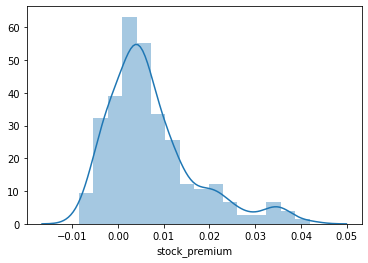

In [25]:
# Stock premium distribution
stk_pr = data.stock_premium
sns.distplot(stk_pr)

## 2.1. Default return spread (DFR)

### 2.2.1. Visualization

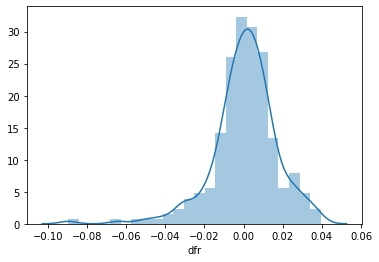

In [ ]:
sns.distplot(data.dfr)

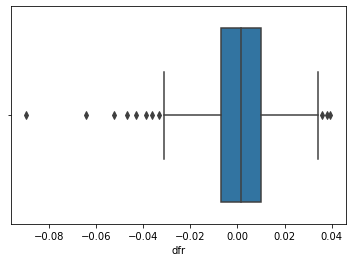

In [ ]:
sns.boxplot(x="dfr", data=data)

In [ ]:
data[['stock_premium', 'dfr']].head(2)

,stock_premium,dfr
0,0.025418,0.004205
1,0.024034,0.003818


In [ ]:
tmp1 = data[['stock_premium', 'yyyyq']].copy().rename(columns = {'stock_premium': 'data'})
tmp1['source'] = 'stock_premium'
tmp2 = data[['dfr', 'yyyyq']].copy().rename(columns = {'dfr': 'data'})
tmp2['source'] = 'dfr'

tmp = pd.concat([tmp1, tmp2])
tmp.head(2)

,data,yyyyq,source
0,0.025418,19471.0,stock_premium
1,0.024034,19472.0,stock_premium


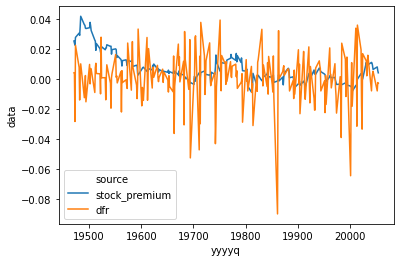

In [ ]:
ax = sns.lineplot(x='yyyyq', y="data", hue="source", data=tmp)

### 2.1.2. Correlations

In [ ]:
scipy.stats.pearsonr(data.dfr, data.stock_premium)

(0.03582392493820161, 0.5839725388338495)

## 2.2. Inflation (infl)

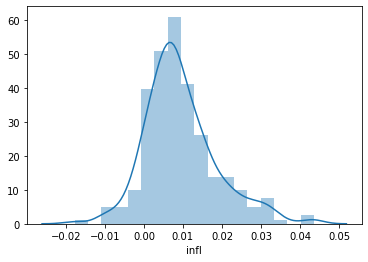

In [ ]:
sns.distplot(data.infl)

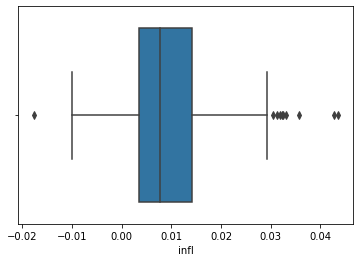

In [ ]:
sns.boxplot(x="infl", data=data)

In [ ]:
tmp1 = data[['stock_premium', 'yyyyq']].copy().rename(columns = {'stock_premium': 'data'})
tmp1['source'] = 'stock_premium'
tmp2 = data[['infl', 'yyyyq']].copy().rename(columns = {'infl': 'data'})
tmp2['source'] = 'infl'

tmp = pd.concat([tmp1, tmp2])
tmp.head(2)

,data,yyyyq,source
0,0.025418,19471.0,stock_premium
1,0.024034,19472.0,stock_premium


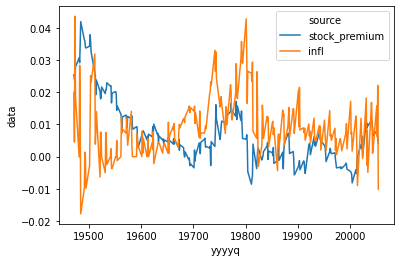

In [ ]:
ax = sns.lineplot(x='yyyyq', y="data", hue="source", data=tmp)

In [ ]:
scipy.stats.pearsonr(data.infl, data.stock_premium)

(-0.06564784971164228, 0.3152675673140047)

## 2.3. Investment-to-capital ratio (I/K)

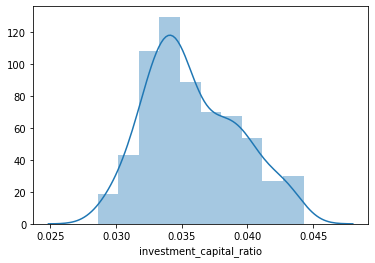

In [ ]:
sns.distplot(data.investment_capital_ratio)

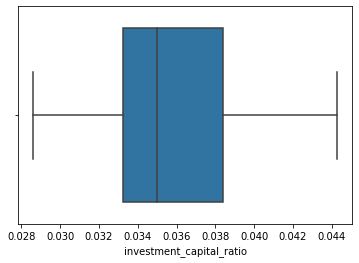

In [ ]:
sns.boxplot(x="investment_capital_ratio", data=data)

In [ ]:
tmp1 = data[['stock_premium', 'yyyyq']].copy().rename(columns = {'stock_premium': 'data'})
tmp1['source'] = 'stock_premium'
tmp2 = data[['investment_capital_ratio', 'yyyyq']].copy().rename(columns = {'investment_capital_ratio': 'data'})
tmp2['source'] = 'investment_capital_ratio'

tmp = pd.concat([tmp1, tmp2])
tmp.head(2)

,data,yyyyq,source
0,0.025418,19471.0,stock_premium
1,0.024034,19472.0,stock_premium


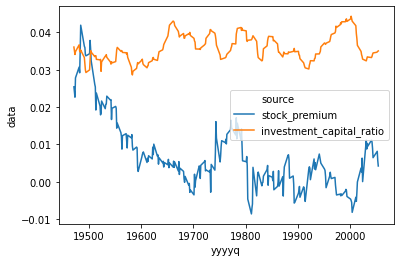

In [ ]:
ax = sns.lineplot(x='yyyyq', y="data", hue="source", data=tmp)

In [ ]:
scipy.stats.pearsonr(data.investment_capital_ratio, data.stock_premium)

(-0.4153248371942793, 2.9460375283595064e-11)

# 4.Combined Model
- Simple model
    - Output: num_of_predictor X out_of_sample_length

- Weight calculation
    - Input: num_of_predictor X out_of_sample_length
    - Output: num_of_predictor X out_of_sample_length

- Final combination
    - Input1: num_of_predictor X out_of_sample_length
    - Input2: num_of_predictor X out_of_sample_length

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Read in combined model
imp_df = pd.read_csv(file_dir + 'cleaned_data.csv')

In [211]:
imp_df.head(2)

,yyyyq,Index,dpr,earning_price_ratio,devident_payout_ratio,svar,b2m,ntis,tbl,lty,ltr,tms,dft,drs,infl,ik,stock_premium
0,19471.0,15.17,3.047824,2.480303,2.480303,0.005718,0.741535,0.050864,0.0038,0.0213,0.003502,0.0175,0.0060,0.004205,0.019952,0.036043,0.025418
1,19472.0,15.21,2.996390,2.357310,2.357310,0.006663,0.741117,0.046888,0.0038,0.0216,0.000587,0.0178,0.0066,0.003818,0.004533,0.035089,0.024034


In [124]:
def regression(intercept_, coef_, inputs):
    assert inputs.shape[0] == coef_.shape[0]
    
    out = intercept_  +  coef_ * inputs
    return out

def weighting(predictions):
    return np.mean(predictions)

In [188]:
signal_cols = ['dpr', 'svar', 'b2m', 'ntis', 'tbl', 'lty', 'ltr', 'tms', 'dft', 'drs', 'infl', 'ik']
M = len(imp_df)

selected_col = ['dpr']

sig_lst = []
for sig in signal_cols:
    r_lst = []
    
    m = 71
    while m < M:
        lg = LinearRegression()

        insample_df = imp_df.loc[: m + 1, [sig]]
        shifted_insample_df = imp_df.iloc[1 : m + 1, :]

        inputs = insample_df.iloc[:m, :].values#.reshape(-1, 1)
        target = shifted_insample_df.stock_premium.values#.reshape(-1, 1)

        # lg.fit(inputs, target)
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(inputs[:, 0], target)

        x_m = insample_df[sig].values[-1:]
        
        # r_m1 = lg.intercept_ * x_m + lg.coef_[0]
        r_m1 = slope * x_m[0] + intercept 
        r_lst.append(r_m1)


        # insample_df = imp_df.loc[: m + 1, [sig]]#.drop('Index', axis = 1)
        # shifted_insample_df = imp_df.iloc[1 :m + 1, :]

        # inputs = insample_df.iloc[: m, :].values#.reshape(-1, 1)
        # target = shifted_insample_df.stock_premium.values.reshape(-1, 1)

        # lg.fit(inputs, target)

        # x_m = inputs[[-1], :]
        # r_m1 = regression(lg.intercept_, lg.coef_, x_m)

        # r_lst.append(r_m1[0][0])


        m += 1
    sig_lst.append(r_lst)
sig_lst = np.array(sig_lst).reshape((12, 165))
sig_lst.shape

(12, 165)

In [189]:
sig_lst

array([[ 0.00486699,  0.00629658,  0.0048726 , ..., -0.00145922,
        -0.00112022, -0.00104412],
       [ 0.01452796,  0.01574861,  0.01425015, ...,  0.00761387,
         0.00747198,  0.00745561],
       [ 0.00296374,  0.00381786,  0.00156265, ...,  0.00303608,
         0.00298267,  0.00299286],
       ...,
       [ 0.01682557,  0.01700739,  0.01639558, ...,  0.00702459,
         0.00700736,  0.0069952 ],
       [ 0.01596819,  0.01758649,  0.01563155, ...,  0.00625109,
         0.00841209,  0.00842826],
       [ 0.02002927,  0.01892932,  0.01724576, ...,  0.00818951,
         0.0080576 ,  0.00803992]])

In [190]:
r_true = data.stock_premium.values
r_true = (r_true[71:])

In [191]:
n_model = 12
# r_true = [] # All the out-of-sample ground truth r; shape: (1 X t)
# r_pred_all = [[]] * n_model # All the out-of-sample predicted r; shape: (n_model X t)

def combined_r(r_pred_lst, w_lst):
    '''
        Calculate a weighted average for combined stock premium
        r_pred_lst: list of predictions of r, shape: (1 X n_model)
        w_lst: list of w, shape: (1 X n_model)
    '''
    if len(r_pred_lst) != len(w_lst):
        print('Error: r_pred_lst and w_lst have different length!')
        return None
    return sum([w_lst[i] * r_pred_lst(i) for i in range(len(r_pred_lst))])

def calc_w_lst(phi_lst):
    '''
        Calculate the weight for each simple model given phi-list
        phi_lst: list of phi, shape: (1 X n_model)
    '''
    sum_of_invert_phi = sum([1/phi for phi in phi_lst])
    return [(1/phi) / sum_of_invert_phi for phi in phi_lst]

def calc_phi_lst_at_t(r_true, r_pred_all, theta, t, n_model):
    '''
        Calculate the time-weighted error for each model, given time and previous predictions
        r_true: all the ground truth r; shape: (1 X t)
        r_pred_all: all the out-of-sample predicted r; shape: (n_model X t)
        theta: theta for this model
        t: current time
    '''
    phi_lst = []
    for i in range(n_model):
        r_pred = r_pred_all[i]
        phi_i = 0
        for s in range(-1, t-1):
            r_true_s = r_true[s + 1]
            r_pred_s = r_pred[s + 1]
            phi_i += theta**(t - 1 - s) * (r_true_s - r_pred_s)**2
        phi_lst.append(phi_i)
    return phi_lst

def weight_calculation(r_pred_matrix, theta, r_true):
    '''
    input:
        r_pred_matrix: (n_model X t)
        r_true: (t X 1)

    output:
        weights: (n_model X t-1)
    '''
    t = 2
    weights = []
    while t < len(r_true) + 1:
        r_pred_t = r_pred_matrix[:, :t]
        phi_lst = calc_phi_lst_at_t(r_true, r_pred_t, theta, t, n_model)
        w_lst = calc_w_lst(phi_lst)
        weights.append(w_lst)
        t += 1
    return np.array(weights).T

def calculate_prediction(all_r_pred, all_weights):
    '''
    input:
        all_r_pred: (n_model X t)
        all_weights: (n_model X t-1)

    output:
        combined_pred: (n_model X t-1)
    '''
    combined_pred = []
    for t in range(all_weights.shape[1]):
        combined_pred.append(sum(all_r_pred[:, t + 1] * all_r_pred[:, t]))
    return np.array(combined_pred)

In [208]:
# Example
theta = 0.9
r_all = sig_lst
w_all = weight_calculation(sig_lst, theta, r_true)
# w_all = np.array([[1/n_model] * (sig_lst.shape[1] - 1) for _ in range(n_model)])

combined_prediction = calculate_prediction(r_all, w_all)
combined_prediction.shape

(164,)

In [209]:
# w_all = np.array([[1/n_model] * (sig_lst.shape[1] - 1) for _ in range(n_model)])
# w_all[0]

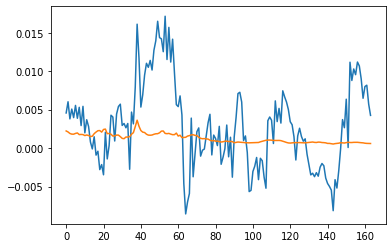

In [210]:
plt.plot(r_true[1:])
plt.plot(combined_prediction)

In [108]:
r_true.shape

(165,)

# END